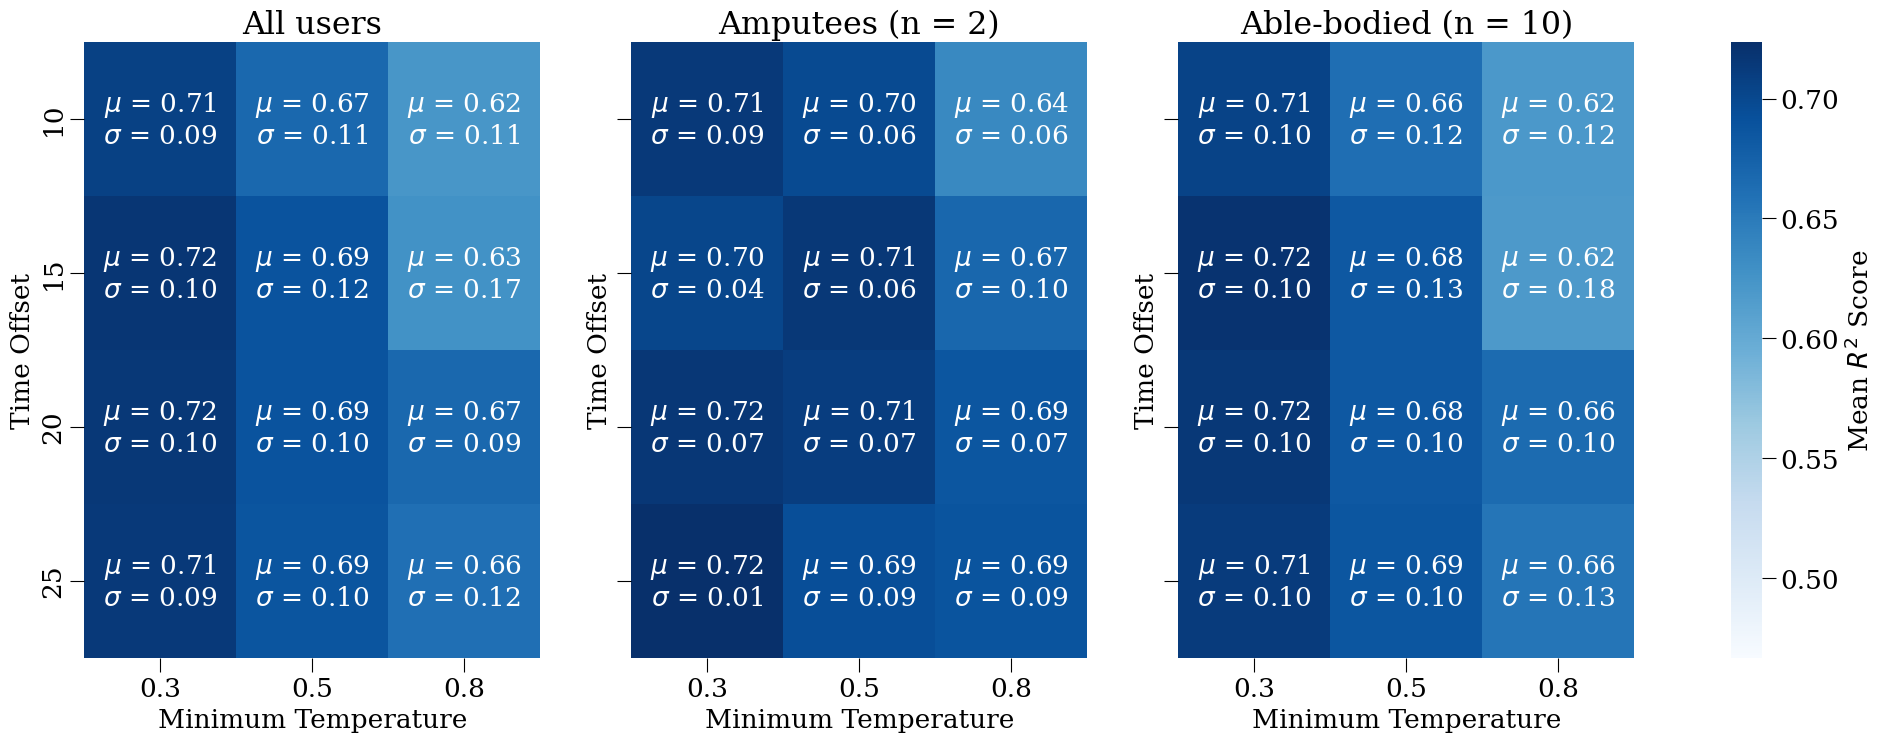

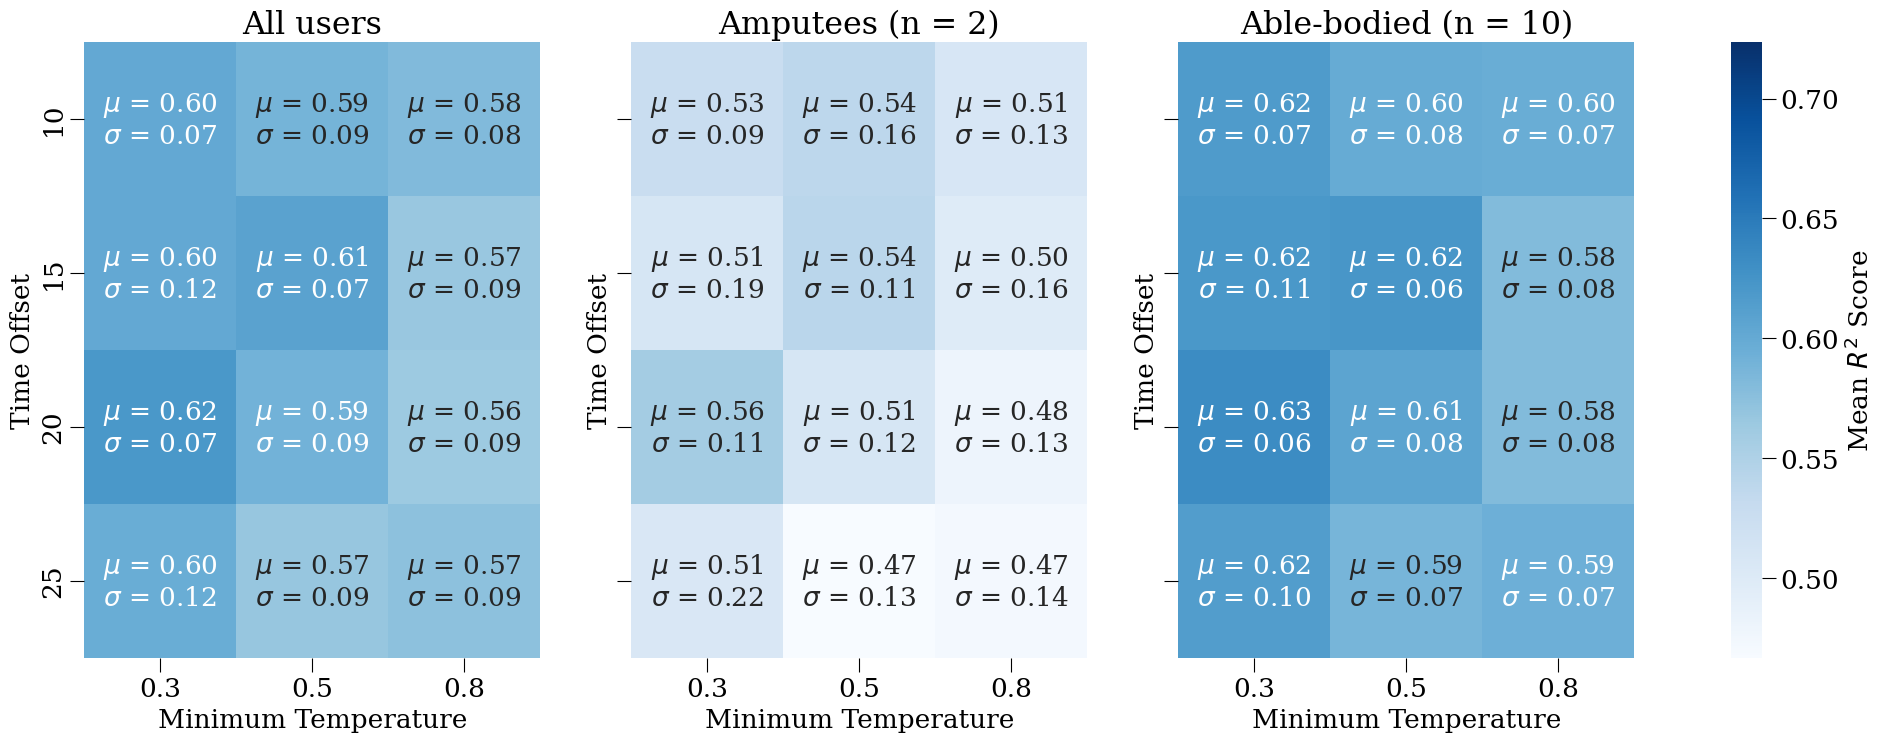

In [12]:
"""

Generates heatmap for the performance of the CEBRA-BEHAVIOUR models. 

CROSS VALIDATION RESULTS and TEST RESULTS 

"""



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.ticker as ticker
import aux_functions as auxf


params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

# Prepare model paths and IDs
time_offset_list = [10, 15, 20, 25]
mintemp_list = [0.3, 0.5, 0.8]


model_type = 'BehContr'
cmap_= 'Blues'


def extract_timeoff_mintemp(s):
    timeoff_pattern = re.compile(r'timeoff(\d+)')
    mintemp_pattern = re.compile(r'mintemp([0-9.]+)')
    timeoff_match = timeoff_pattern.search(s)
    mintemp_match = mintemp_pattern.search(s)
    timeoff = int(timeoff_match.group(1)) if timeoff_match else None
    mintemp = float(mintemp_match.group(1)) if mintemp_match else None
    return timeoff, mintemp


def create_heatmap(df, title, ax, vmin, vmax):
    pivot_r2 = df.pivot_table(index='timeoff', columns='mintemp', values='Mean $R^2$', aggfunc='mean')
    pivot_std = df.pivot_table(index='timeoff', columns='mintemp', values='std $R^2$', aggfunc='mean')
    annotations = np.array([[f"$\mu$ = {mean:.2f}\n$\sigma$ = {std:.2f}" for mean, std in zip(mean_row, std_row)]
                            for mean_row, std_row in zip(pivot_r2.values, pivot_std.values)])
    sns.heatmap(pivot_r2, annot=annotations, fmt="", cmap=cmap_, ax=ax, cbar=False, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('Minimum Temperature')
    ax.set_ylabel('Time Offset')


# -------------------- CROSS VALIDATION ------------------------------ #


model_path_list = []
modelID_list = []



for time_offset in time_offset_list:
    for min_temp in mintemp_list:
        modelID = f"offset-36_timeoff{time_offset}_mintemp{min_temp}"
        modelID_list.append(modelID)
        path_model_results = f'./regression/{model_type}/{modelID}/bestmodel_results.csv'
        model_path_list.append(path_model_results)

# all_results = pd.DataFrame()


model_info_list = []
AB_model_info_list = []
Amp_model_info_list = []
# Read and append data
for i, model_path_ in enumerate(model_path_list):

    df = pd.read_csv(model_path_)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(['best_params'], axis=1)

    timeoff_model, mintemp_model = extract_timeoff_mintemp(model_path_)

    user_means = df.drop('user', axis=1)
    mean_model = user_means['best_score_r2'].mean()
    std_model = user_means['best_score_r2'].std()
    model_info = [mean_model, std_model, timeoff_model, mintemp_model]
    model_info_list.append(model_info)

    AB_df = df[df['user'].isin(range(1, 11))]
    AB_user_means = AB_df.drop('user', axis=1).mean(axis=1)
    AB_mean_model = AB_user_means.mean()
    AB_std_model = AB_user_means.std()
    AB_model_info = [AB_mean_model, AB_std_model, timeoff_model, mintemp_model]
    AB_model_info_list.append(AB_model_info)

    Amp_df = df[df['user'].isin([11, 12])]
    Amp_user_means = Amp_df.drop('user', axis=1).mean(axis=1)
    Amp_mean_model = Amp_user_means.mean()
    Amp_std_model = Amp_user_means.std()
    Amp_model_info = [Amp_mean_model, Amp_std_model, timeoff_model, mintemp_model]
    Amp_model_info_list.append(Amp_model_info)

    
all_users_df_CV = pd.DataFrame(model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
ab_users_df_CV = pd.DataFrame(AB_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
amp_users_df_CV = pd.DataFrame(Amp_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])



# -------------------- TEST ------------------------------ #


model_path_list = []
modelID_list = []


for time_offset in time_offset_list:
    for min_temp in mintemp_list:
        modelID = f"offset-36_timeoff{time_offset}_mintemp{min_temp}"
        modelID_list.append(modelID)
        path_model_results = f'./regression/{model_type}/{modelID}/test_r2_results.csv'
        model_path_list.append(path_model_results)

# all_results = pd.DataFrame()


model_info_list = []
AB_model_info_list = []
Amp_model_info_list = []
# Read and append data
for i, model_path_ in enumerate(model_path_list):

    df = pd.read_csv(model_path_)
    df = df.drop(['Unnamed: 0'], axis=1)

    timeoff_model, mintemp_model = extract_timeoff_mintemp(model_path_)

    user_means = df.drop('user', axis=1).mean(axis=1)
    mean_model = user_means.mean()
    std_model = user_means.std()
    model_info = [mean_model, std_model, timeoff_model, mintemp_model]
    model_info_list.append(model_info)

    AB_df = df[df['user'].isin(range(1, 11))]
    AB_user_means = AB_df.drop('user', axis=1).mean(axis=1)
    AB_mean_model = AB_user_means.mean()
    AB_std_model = AB_user_means.std()
    AB_model_info = [AB_mean_model, AB_std_model, timeoff_model, mintemp_model]
    AB_model_info_list.append(AB_model_info)

    Amp_df = df[df['user'].isin([11, 12])]
    Amp_user_means = Amp_df.drop('user', axis=1).mean(axis=1)
    Amp_mean_model = Amp_user_means.mean()
    Amp_std_model = Amp_user_means.std()
    Amp_model_info = [Amp_mean_model, Amp_std_model, timeoff_model, mintemp_model]
    Amp_model_info_list.append(Amp_model_info)

    
all_users_df_test = pd.DataFrame(model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
ab_users_df_test = pd.DataFrame(AB_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
amp_users_df_test = pd.DataFrame(Amp_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])






# Prepare dataframes for plotting

# Find global min and max R^2 values for a consistent color scale
min_r2 = min(ab_users_df_test['Mean $R^2$'].min(), amp_users_df_test['Mean $R^2$'].min(), ab_users_df_CV['Mean $R^2$'].min(), amp_users_df_CV['Mean $R^2$'].min())
max_r2 = max(ab_users_df_test['Mean $R^2$'].max(), amp_users_df_test['Mean $R^2$'].max(), ab_users_df_CV['Mean $R^2$'].max(), amp_users_df_CV['Mean $R^2$'].max())


heatmap_path = './regression_results/plots/heatmaps'
auxf.ensure_directory_exists(heatmap_path)



# ----------- create heatmap cross validation -------------- # 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

create_heatmap(all_users_df_CV, 'All users', axes[0], min_r2, max_r2)

create_heatmap(amp_users_df_CV, 'Amputees (n = 2)', axes[1], min_r2, max_r2)

create_heatmap(ab_users_df_CV, 'Able-bodied (n = 10)', axes[2], min_r2, max_r2)

sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.Normalize(vmin=min_r2, vmax=max_r2))
sm._A = []
cb = plt.colorbar(sm, ax=axes, orientation='vertical', label='Mean $R^2$ Score')

cb.outline.set_visible(False)
# plt.tight_layout()
plt.savefig(f'{heatmap_path}/CEBRA_{model_type}_CV_HEATMAP.png')
plt.show()

# ----------- create heatmap test -------------- # 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

create_heatmap(all_users_df_test, 'All users', axes[0], min_r2, max_r2)

create_heatmap(amp_users_df_test, 'Amputees (n = 2)', axes[1], min_r2, max_r2)

create_heatmap(ab_users_df_test, 'Able-bodied (n = 10)', axes[2], min_r2, max_r2)

sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.Normalize(vmin=min_r2, vmax=max_r2))
sm._A = []
cb = plt.colorbar(sm, ax=axes, orientation='vertical', label='Mean $R^2$ Score')

cb.outline.set_visible(False)
# plt.tight_layout()
plt.savefig(f'{heatmap_path}/CEBRA_{model_type}_TEST_HEATMAP.png')
plt.show()



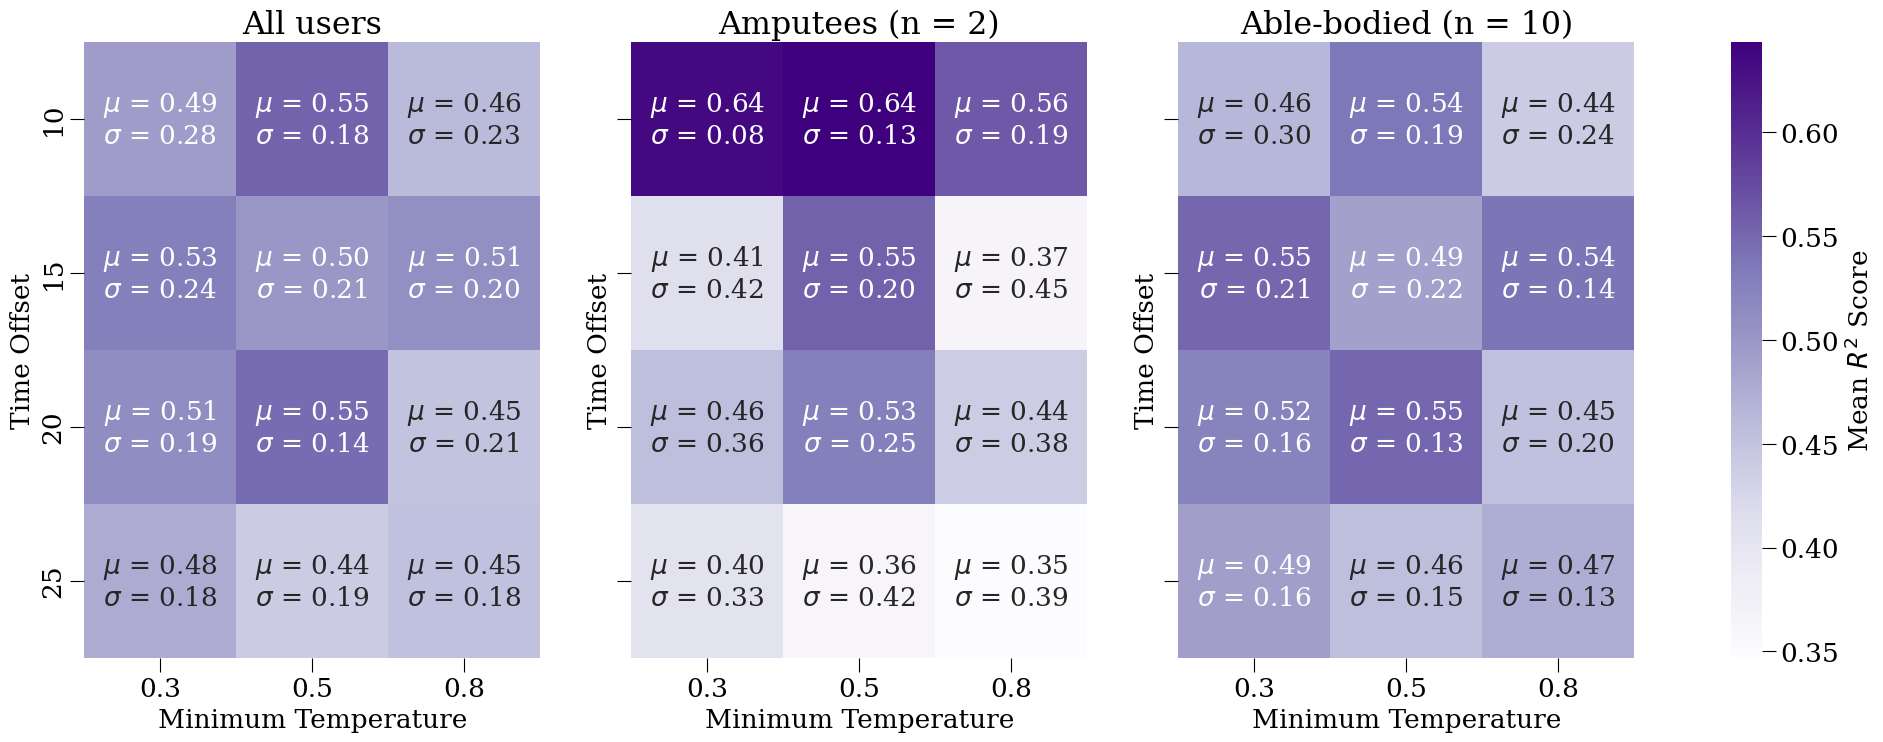

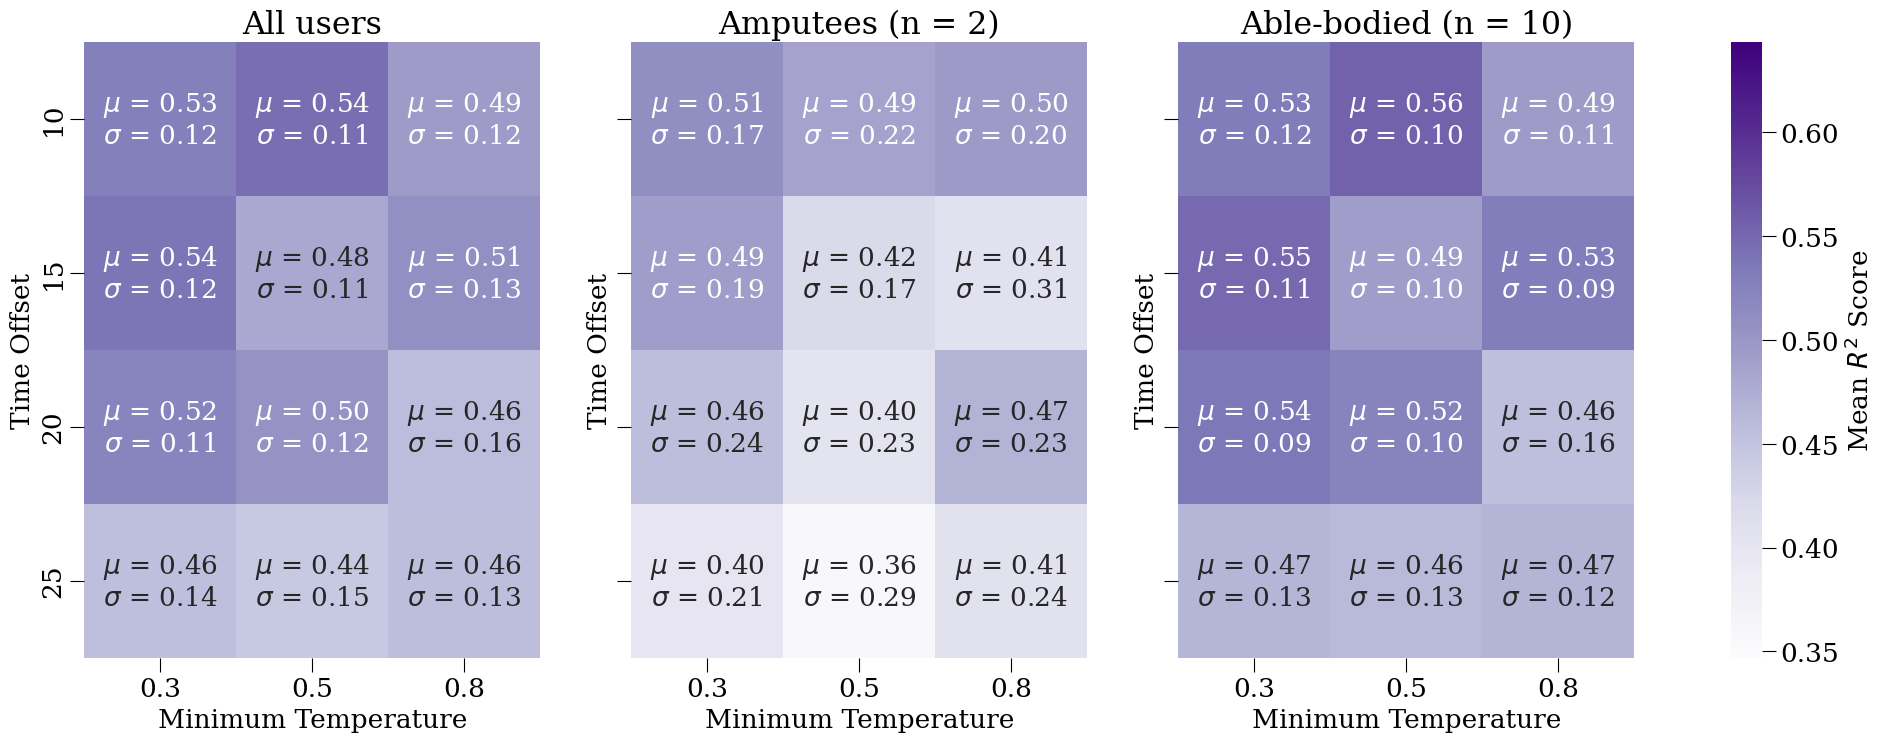

In [11]:
"""

Generates heatmap for the performance of the CEBRA-HYBRID models. 

CROSS VALIDATION RESULTS and TEST RESULTS 

"""



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.ticker as ticker
import aux_functions as auxf


params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

# Prepare model paths and IDs
time_offset_list = [10, 15, 20, 25]
mintemp_list = [0.3, 0.5, 0.8]

model_type = 'Hybrid'
cmap_ = "Purples"



def extract_timeoff_mintemp(s):
    timeoff_pattern = re.compile(r'timeoff(\d+)')
    mintemp_pattern = re.compile(r'mintemp([0-9.]+)')
    timeoff_match = timeoff_pattern.search(s)
    mintemp_match = mintemp_pattern.search(s)
    timeoff = int(timeoff_match.group(1)) if timeoff_match else None
    mintemp = float(mintemp_match.group(1)) if mintemp_match else None
    return timeoff, mintemp


def create_heatmap(df, title, ax, vmin, vmax):
    pivot_r2 = df.pivot_table(index='timeoff', columns='mintemp', values='Mean $R^2$', aggfunc='mean')
    pivot_std = df.pivot_table(index='timeoff', columns='mintemp', values='std $R^2$', aggfunc='mean')
    annotations = np.array([[f"$\mu$ = {mean:.2f}\n$\sigma$ = {std:.2f}" for mean, std in zip(mean_row, std_row)]
                            for mean_row, std_row in zip(pivot_r2.values, pivot_std.values)])
    sns.heatmap(pivot_r2, annot=annotations, fmt="", cmap=cmap_, ax=ax, cbar=False, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('Minimum Temperature')
    ax.set_ylabel('Time Offset')


# -------------------- CROSS VALIDATION ------------------------------ #


model_path_list = []
modelID_list = []


for time_offset in time_offset_list:
    for min_temp in mintemp_list:
        modelID = f"offset-36_timeoff{time_offset}_mintemp{min_temp}"
        modelID_list.append(modelID)
        path_model_results = f'./regression/{model_type}/{modelID}/bestmodel_results.csv'
        model_path_list.append(path_model_results)

# all_results = pd.DataFrame()


model_info_list = []
AB_model_info_list = []
Amp_model_info_list = []
# Read and append data
for i, model_path_ in enumerate(model_path_list):

    df = pd.read_csv(model_path_)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(['best_params'], axis=1)

    timeoff_model, mintemp_model = extract_timeoff_mintemp(model_path_)

    user_means = df.drop('user', axis=1)
    mean_model = user_means['best_score_r2'].mean()
    std_model = user_means['best_score_r2'].std()
    model_info = [mean_model, std_model, timeoff_model, mintemp_model]
    model_info_list.append(model_info)

    AB_df = df[df['user'].isin(range(1, 11))]
    AB_user_means = AB_df.drop('user', axis=1).mean(axis=1)
    AB_mean_model = AB_user_means.mean()
    AB_std_model = AB_user_means.std()
    AB_model_info = [AB_mean_model, AB_std_model, timeoff_model, mintemp_model]
    AB_model_info_list.append(AB_model_info)

    Amp_df = df[df['user'].isin([11, 12])]
    Amp_user_means = Amp_df.drop('user', axis=1).mean(axis=1)
    Amp_mean_model = Amp_user_means.mean()
    Amp_std_model = Amp_user_means.std()
    Amp_model_info = [Amp_mean_model, Amp_std_model, timeoff_model, mintemp_model]
    Amp_model_info_list.append(Amp_model_info)

    
all_users_df_CV = pd.DataFrame(model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
ab_users_df_CV = pd.DataFrame(AB_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
amp_users_df_CV = pd.DataFrame(Amp_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])



# -------------------- TEST ------------------------------ #


model_path_list = []
modelID_list = []


for time_offset in time_offset_list:
    for min_temp in mintemp_list:
        modelID = f"offset-36_timeoff{time_offset}_mintemp{min_temp}"
        modelID_list.append(modelID)
        path_model_results = f'./regression/{model_type}/{modelID}/test_r2_results.csv'
        model_path_list.append(path_model_results)

# all_results = pd.DataFrame()


model_info_list = []
AB_model_info_list = []
Amp_model_info_list = []
# Read and append data
for i, model_path_ in enumerate(model_path_list):

    df = pd.read_csv(model_path_)
    df = df.drop(['Unnamed: 0'], axis=1)

    timeoff_model, mintemp_model = extract_timeoff_mintemp(model_path_)

    user_means = df.drop('user', axis=1).mean(axis=1)
    mean_model = user_means.mean()
    std_model = user_means.std()
    model_info = [mean_model, std_model, timeoff_model, mintemp_model]
    model_info_list.append(model_info)

    AB_df = df[df['user'].isin(range(1, 11))]
    AB_user_means = AB_df.drop('user', axis=1).mean(axis=1)
    AB_mean_model = AB_user_means.mean()
    AB_std_model = AB_user_means.std()
    AB_model_info = [AB_mean_model, AB_std_model, timeoff_model, mintemp_model]
    AB_model_info_list.append(AB_model_info)

    Amp_df = df[df['user'].isin([11, 12])]
    Amp_user_means = Amp_df.drop('user', axis=1).mean(axis=1)
    Amp_mean_model = Amp_user_means.mean()
    Amp_std_model = Amp_user_means.std()
    Amp_model_info = [Amp_mean_model, Amp_std_model, timeoff_model, mintemp_model]
    Amp_model_info_list.append(Amp_model_info)

    
all_users_df_test = pd.DataFrame(model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
ab_users_df_test = pd.DataFrame(AB_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])
amp_users_df_test = pd.DataFrame(Amp_model_info_list, columns=['Mean $R^2$', 'std $R^2$', 'timeoff', 'mintemp'])






# Prepare dataframes for plotting

# Find global min and max R^2 values for a consistent color scale
min_r2 = min(ab_users_df_test['Mean $R^2$'].min(), amp_users_df_test['Mean $R^2$'].min(), ab_users_df_CV['Mean $R^2$'].min(), amp_users_df_CV['Mean $R^2$'].min())
max_r2 = max(ab_users_df_test['Mean $R^2$'].max(), amp_users_df_test['Mean $R^2$'].max(), ab_users_df_CV['Mean $R^2$'].max(), amp_users_df_CV['Mean $R^2$'].max())


heatmap_path = './regression_results/plots/heatmaps'
auxf.ensure_directory_exists(heatmap_path)



# ----------- create heatmap cross validation -------------- # 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

create_heatmap(all_users_df_CV, 'All users', axes[0], min_r2, max_r2)

create_heatmap(amp_users_df_CV, 'Amputees (n = 2)', axes[1], min_r2, max_r2)

create_heatmap(ab_users_df_CV, 'Able-bodied (n = 10)', axes[2], min_r2, max_r2)

sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.Normalize(vmin=min_r2, vmax=max_r2))
sm._A = []
cb = plt.colorbar(sm, ax=axes, orientation='vertical', label='Mean $R^2$ Score')

cb.outline.set_visible(False)
# plt.tight_layout()
plt.savefig(f'{heatmap_path}/CEBRA_{model_type}_CV_HEATMAP.png')
plt.show()

# ----------- create heatmap test -------------- # 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

create_heatmap(all_users_df_test, 'All users', axes[0], min_r2, max_r2)

create_heatmap(amp_users_df_test, 'Amputees (n = 2)', axes[1], min_r2, max_r2)

create_heatmap(ab_users_df_test, 'Able-bodied (n = 10)', axes[2], min_r2, max_r2)

sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.Normalize(vmin=min_r2, vmax=max_r2))
sm._A = []
cb = plt.colorbar(sm, ax=axes, orientation='vertical', label='Mean $R^2$ Score')

cb.outline.set_visible(False)
# plt.tight_layout()
plt.savefig(f'{heatmap_path}/CEBRA_{model_type}_TEST_HEATMAP.png')
plt.show()



min_temp 0.3
time_offset 10
on gesture 1 and start195 and end683
min_temp 0.5
time_offset 10
on gesture 1 and start195 and end683
min_temp 0.8
time_offset 10
on gesture 1 and start195 and end683
min_temp 0.3
time_offset 20
on gesture 1 and start195 and end683


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.5
time_offset 20
on gesture 1 and start195 and end683
min_temp 0.8
time_offset 20
on gesture 1 and start195 and end683
min_temp 0.3
time_offset 25
on gesture 1 and start195 and end683
min_temp 0.5
time_offset 25
on gesture 1 and start195 and end683
min_temp 0.8
time_offset 25
on gesture 1 and start195 and end683


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 2 and start684 and end1159
min_temp 0.5
time_offset 10
on gesture 2 and start684 and end1159
min_temp 0.8
time_offset 10
on gesture 2 and start684 and end1159
min_temp 0.3
time_offset 20
on gesture 2 and start684 and end1159
min_temp 0.5
time_offset 20


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

on gesture 2 and start684 and end1159
min_temp 0.8
time_offset 20
on gesture 2 and start684 and end1159
min_temp 0.3
time_offset 25
on gesture 2 and start684 and end1159
min_temp 0.5
time_offset 25
on gesture 2 and start684 and end1159
min_temp 0.8
time_offset 25
on gesture 2 and start684 and end1159


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 3 and start1160 and end1726
min_temp 0.5
time_offset 10
on gesture 3 and start1160 and end1726
min_temp 0.8
time_offset 10
on gesture 3 and start1160 and end1726
min_temp 0.3
time_offset 20
on gesture 3 and start1160 and end1726
min_temp 0.5
time_offset 20
on gesture 3 and start1160 and end1726


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.8
time_offset 20
on gesture 3 and start1160 and end1726
min_temp 0.3
time_offset 25
on gesture 3 and start1160 and end1726
min_temp 0.5
time_offset 25
on gesture 3 and start1160 and end1726
min_temp 0.8
time_offset 25
on gesture 3 and start1160 and end1726


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 4 and start1727 and end2291
min_temp 0.5
time_offset 10
on gesture 4 and start1727 and end2291
min_temp 0.8
time_offset 10
on gesture 4 and start1727 and end2291
min_temp 0.3
time_offset 20
on gesture 4 and start1727 and end2291
min_temp 0.5
time_offset 20
on gesture 4 and start1727 and end2291


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.8
time_offset 20
on gesture 4 and start1727 and end2291
min_temp 0.3
time_offset 25
on gesture 4 and start1727 and end2291
min_temp 0.5
time_offset 25
on gesture 4 and start1727 and end2291
min_temp 0.8
time_offset 25
on gesture 4 and start1727 and end2291


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 5 and start2292 and end2755
min_temp 0.5
time_offset 10


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))


on gesture 5 and start2292 and end2755
min_temp 0.8
time_offset 10
on gesture 5 and start2292 and end2755
min_temp 0.3
time_offset 20
on gesture 5 and start2292 and end2755
min_temp 0.5
time_offset 20
on gesture 5 and start2292 and end2755
min_temp 0.8
time_offset 20
on gesture 5 and start2292 and end2755
min_temp 0.3
time_offset 25


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

on gesture 5 and start2292 and end2755
min_temp 0.5
time_offset 25
on gesture 5 and start2292 and end2755
min_temp 0.8
time_offset 25
on gesture 5 and start2292 and end2755


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))


min_temp 0.3
time_offset 10
on gesture 6 and start2756 and end3323
min_temp 0.5
time_offset 10
on gesture 6 and start2756 and end3323
min_temp 0.8
time_offset 10
on gesture 6 and start2756 and end3323
min_temp 0.3
time_offset 20
on gesture 6 and start2756 and end3323
min_temp 0.5
time_offset 20
on gesture 6 and start2756 and end3323


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.8
time_offset 20
on gesture 6 and start2756 and end3323
min_temp 0.3
time_offset 25
on gesture 6 and start2756 and end3323
min_temp 0.5
time_offset 25
on gesture 6 and start2756 and end3323
min_temp 0.8
time_offset 25
on gesture 6 and start2756 and end3323


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 7 and start3324 and end3987
min_temp 0.5
time_offset 10
on gesture 7 and start3324 and end3987
min_temp 0.8
time_offset 10
on gesture 7 and start3324 and end3987
min_temp 0.3
time_offset 20
on gesture 7 and start3324 and end3987
min_temp 0.5
time_offset 20
on gesture 7 and start3324 and end3987


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.8
time_offset 20
on gesture 7 and start3324 and end3987
min_temp 0.3
time_offset 25
on gesture 7 and start3324 and end3987
min_temp 0.5
time_offset 25
on gesture 7 and start3324 and end3987
min_temp 0.8
time_offset 25
on gesture 7 and start3324 and end3987


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.3
time_offset 10
on gesture 8 and start3988 and end4534
min_temp 0.5
time_offset 10
on gesture 8 and start3988 and end4534
min_temp 0.8
time_offset 10


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))


on gesture 8 and start3988 and end4534
min_temp 0.3
time_offset 20
on gesture 8 and start3988 and end4534
min_temp 0.5
time_offset 20
on gesture 8 and start3988 and end4534
min_temp 0.8
time_offset 20
on gesture 8 and start3988 and end4534
min_temp 0.3
time_offset 25
on gesture 8 and start3988 and end4534


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap functi

min_temp 0.5
time_offset 25
on gesture 8 and start3988 and end4534
min_temp 0.8
time_offset 25
on gesture 8 and start3988 and end4534


/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))
/tmp/ipykernel_4223/2081411741.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', len(all_labels))


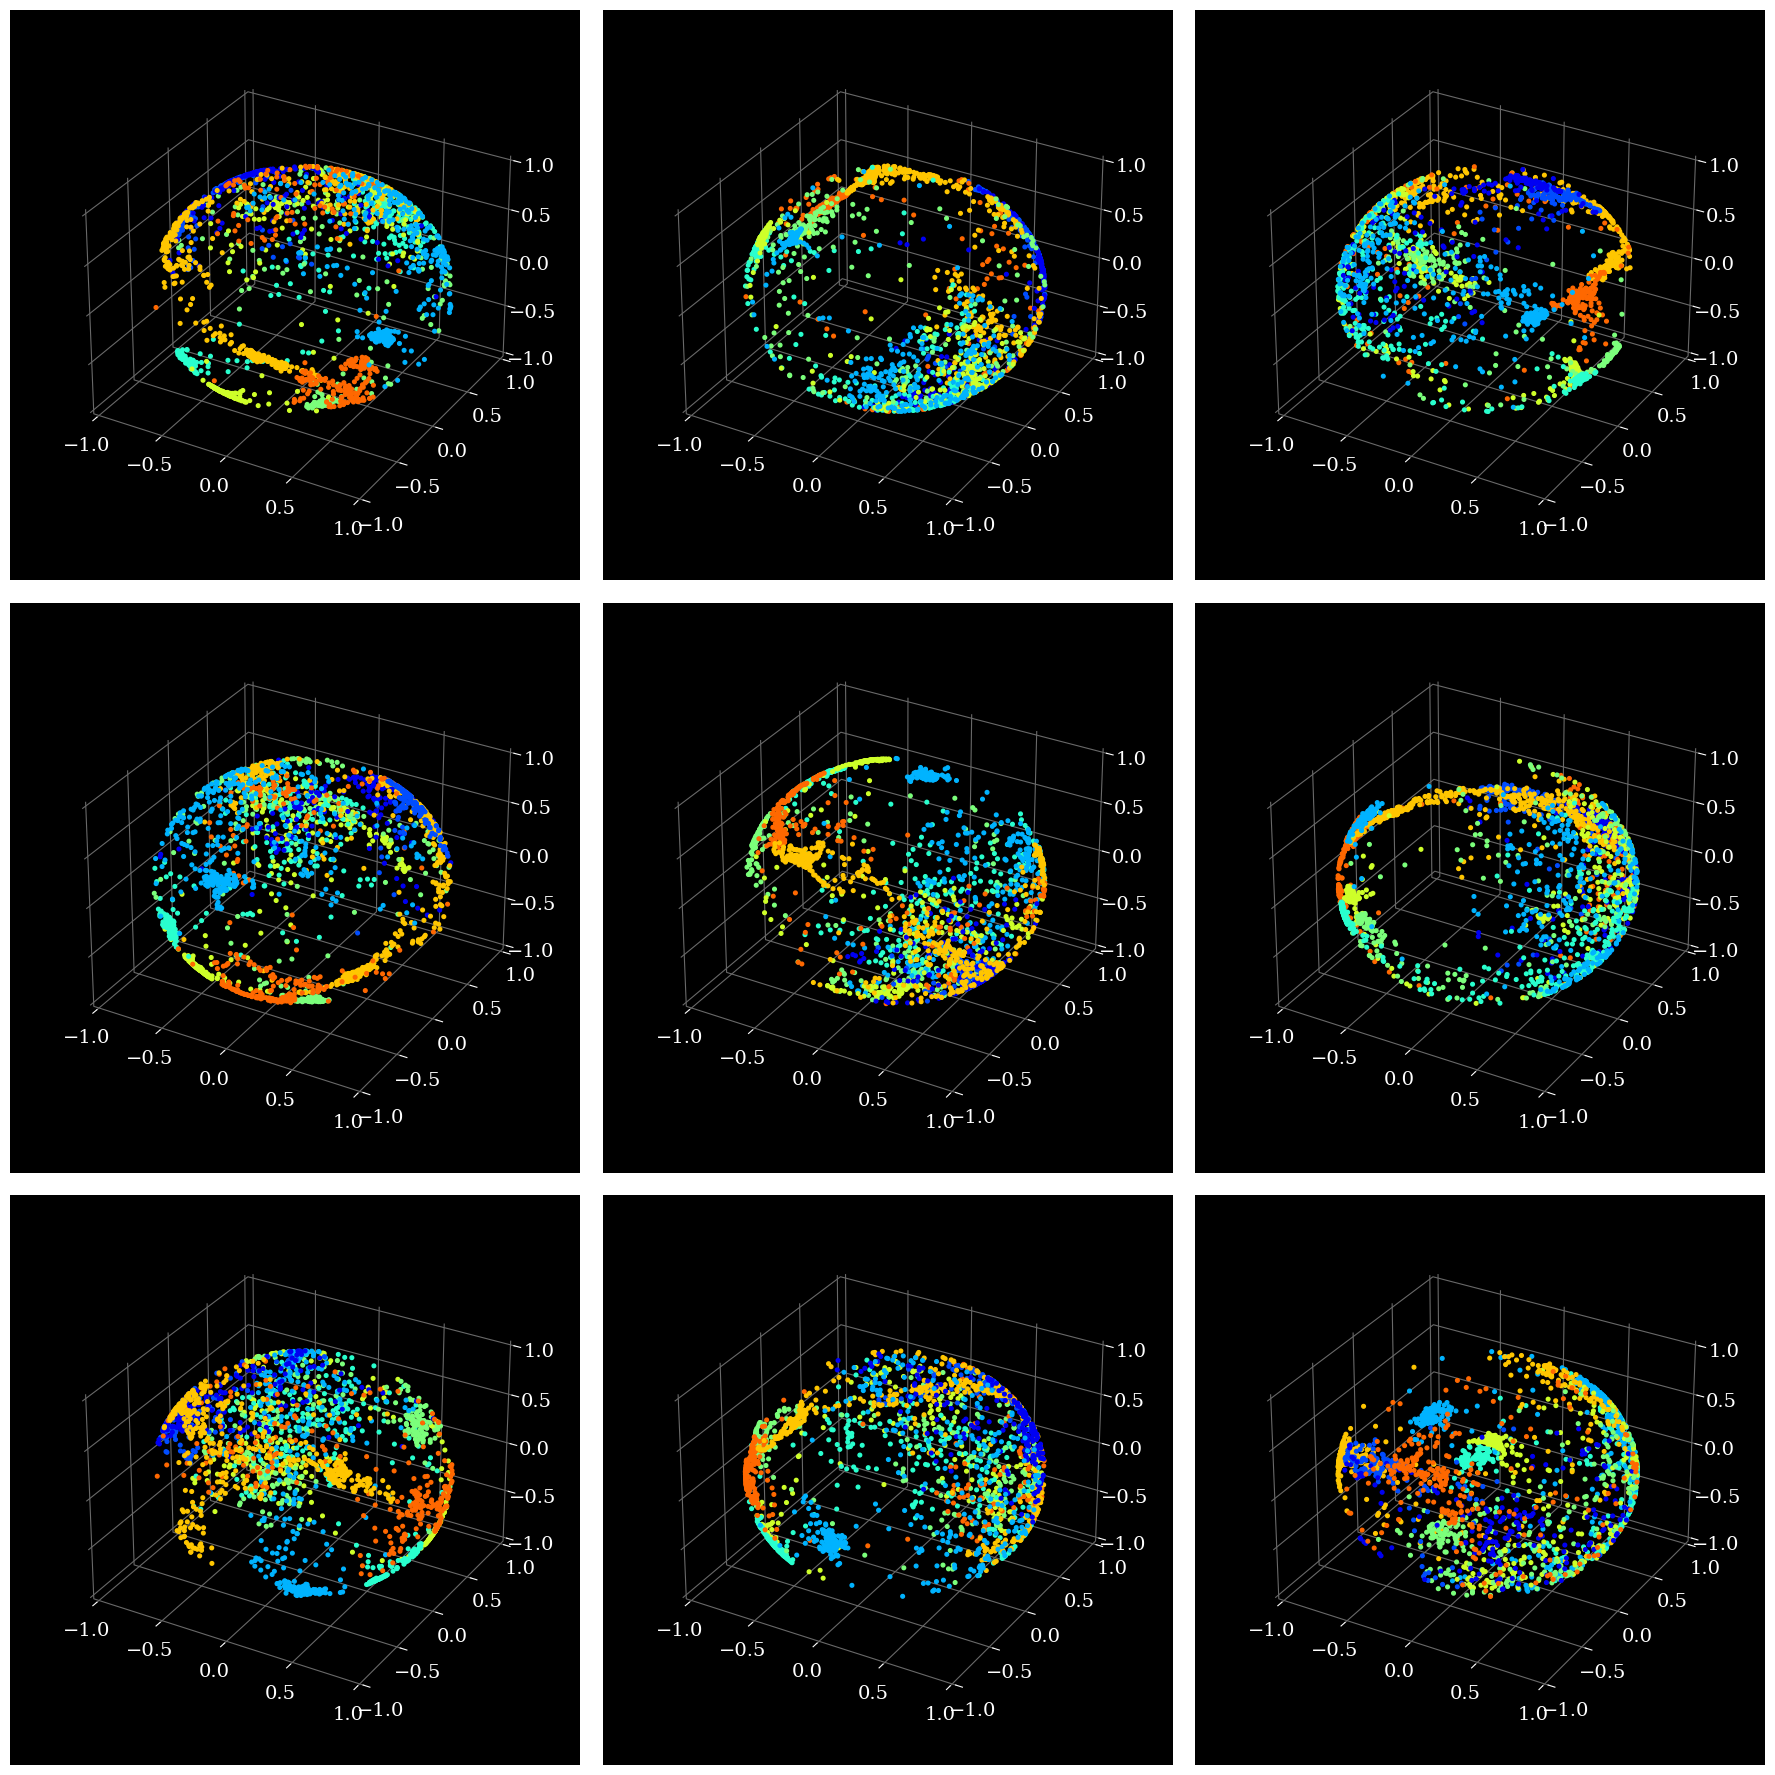

In [3]:
# 2


import sys

sys.path.append("/home/sofia/BEng_diss")


import matplotlib.pyplot as plt
import numpy as np
import aux_functions as auxf
import matplotlib.pyplot as plt
import numpy as np
import aux_functions as auxf
import pandas as pd
from cebra import CEBRA
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator



params = {"font.family" : "serif"}
plt.rcParams.update(params)


min_temp_list = [0.3, 0.5, 0.8]
time_offset_list = [10, 20, 25]

def plotGestures():

    user = 9
    # gesture = 9

    embed_directory = f'./hyperparam_plots/embedding_plots'
    auxf.ensure_directory_exists(embed_directory)



    model_ID = f"user{user}"

    emg1 = auxf.getProcessedEMG(user = user, dataset= 1, type_data = 'all')
    emg2 = auxf.getProcessedEMG(user = user, dataset= 2, type_data = 'all')

    stim1 = auxf.getProcessedData(user = user, dataset=1, mode = 'restimulus', rawBool=False)
    stim2 = auxf.getProcessedData(user = user, dataset=2, mode = 'restimulus', rawBool=False)

    glove1 = (auxf.getMappedGlove(user = user, dataset=1)).T
    glove2 = (auxf.getMappedGlove(user = user, dataset=2)).T

    # create trainval   
    emg_trainval = np.concatenate((emg1, emg2))
    glove_trainval = np.concatenate((glove1, glove2))

    emg_test = auxf.getProcessedEMG(user = user, dataset= 3, type_data = 'all')
    stim_test = auxf.getProcessedData(user = user, dataset=3, mode = 'restimulus', rawBool=False)
    glove_test = (auxf.getMappedGlove(user = user, dataset=3)).T

    fig, axes = plt.subplots(3, 3, figsize=(19, 18), subplot_kw={'projection': '3d'})  # All subplots are 3D
    axes = axes.flatten()

    gesture_list = np.arange(1, 9)

    for gesture in gesture_list:
        for i, time_offset in enumerate(time_offset_list):
            for j, min_temp in enumerate(min_temp_list):
     
                print("min_temp", min_temp)
                print("time_offset", time_offset)

                ax_index = i * len(min_temp_list) + j
                ax = axes[ax_index]


                model_path = f"./saved_models/BehContr/offset-36_timeoff{time_offset}_mintemp{min_temp}"
                # auxf.ensure_directory_exists(model_path)

                full_model_path = f"{model_path}/user{user}_regression.pt"

                model = CEBRA.load(full_model_path)
                # cebra_model.save(f"{model_path}/user{user}_mintemp{min_temp}_offset{time_offset}_model36.pt")

                start, end = auxf.cutStimulus(stimulus_data=stim_test, required_stimulus=gesture)
                print(f"on gesture {gesture} and start{start} and end{end}")


                embedding = model.transform(emg_test[start:end])

                labels = stim_test[start: end]
                labels = labels.flatten()

                non_zero_indices = labels != 0
                filtered_embedding = embedding[non_zero_indices]
                filtered_labels = labels[non_zero_indices]

                all_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                unique_labels = np.unique(all_labels)

                # Create a new colormap from jet, but make the lowest value white
                jet = plt.cm.get_cmap('jet', len(all_labels))
                colors = jet(np.linspace(0, 1, len(all_labels)))
                colors[0] = (0, 0, 0, 0)  # RGBA for white

                custom_cmap = LinearSegmentedColormap.from_list('custom_jet', colors, N=len(colors))

                # Create a mapping from labels to colors
                color_map = dict(zip(unique_labels, custom_cmap(np.linspace(0, 1, len(unique_labels)))))

                # Assign colors to each data point
                point_colors = [color_map[label] for label in filtered_labels]


                for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
                    axis._axinfo["grid"].update({"color": gridline_color})


                # Customizing each subplot
                ax.set_facecolor('black')
                axis_pane_color = 'black'
                ax.xaxis.set_pane_color(axis_pane_color)
                ax.yaxis.set_pane_color(axis_pane_color)
                ax.zaxis.set_pane_color(axis_pane_color)

                ax.set_box_aspect(aspect = None, zoom = 0.85)
                # ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c = point_colors, s = 7, alpha = 1, edgecolors = 'white', linewidths = 0.15)
                ax.scatter(filtered_embedding[:, 0], filtered_embedding[:, 1], filtered_embedding[:, 2], c = point_colors, s = 7, alpha = 1)

                # ax.set_title(f"{model_name}, Mintemp: {min_temp}"  , color = 'white', fontsize = miniplotsize, y = 0.97)

                ax.tick_params(axis='x', colors='white', size = 1)
                ax.xaxis.set_tick_params(labelsize=labelsize) 
                ax.tick_params(axis='y', colors='white', size = 1)
                ax.yaxis.set_tick_params(labelsize=labelsize)
                ax.tick_params(axis='z', colors='white', size = 1)
                ax.zaxis.set_tick_params(labelsize=labelsize) 

                ax.set_xlim(-1, 1)
                ax.set_ylim(-1, 1)
                ax.set_zlim(-1, 1)


                for ax in axes:
                    ax.xaxis.set_major_locator(MaxNLocator(4))
                    ax.yaxis.set_major_locator(MaxNLocator(4))
                    ax.zaxis.set_major_locator(MaxNLocator(4))

                plt.tight_layout()

        # plt.tight_layout()
        plt.grid(False)
        full_plot_path = f"{embed_directory}/{model_ID}_embedding_CEBRA_model36_var_offset_var_mintemp_gesture{gesture}.png"
        plt.savefig(full_plot_path)



    

# --------------------------------------# 
suptitlesize = 17
labelsize = 14
miniplotsize = 20

gridline_color = 'dimgray'
# --------------------------------------# 

iterations = 20000

user_list = [1, 2, 3, 4 ,5, 6, 7 ,9, 10]

user = 9
plotGestures()




min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.3
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 15
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 20
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cm

min_temp 0.8
time_offset 20
on gesture 5 and start2317 and end2850
min_temp 0.3
time_offset 25


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


on gesture 5 and start2317 and end2850
min_temp 0.5
time_offset 25
on gesture 5 and start2317 and end2850
min_temp 0.8
time_offset 25
on gesture 5 and start2317 and end2850


/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))
/tmp/ipykernel_4223/1686289089.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('plasma', len(all_labels))


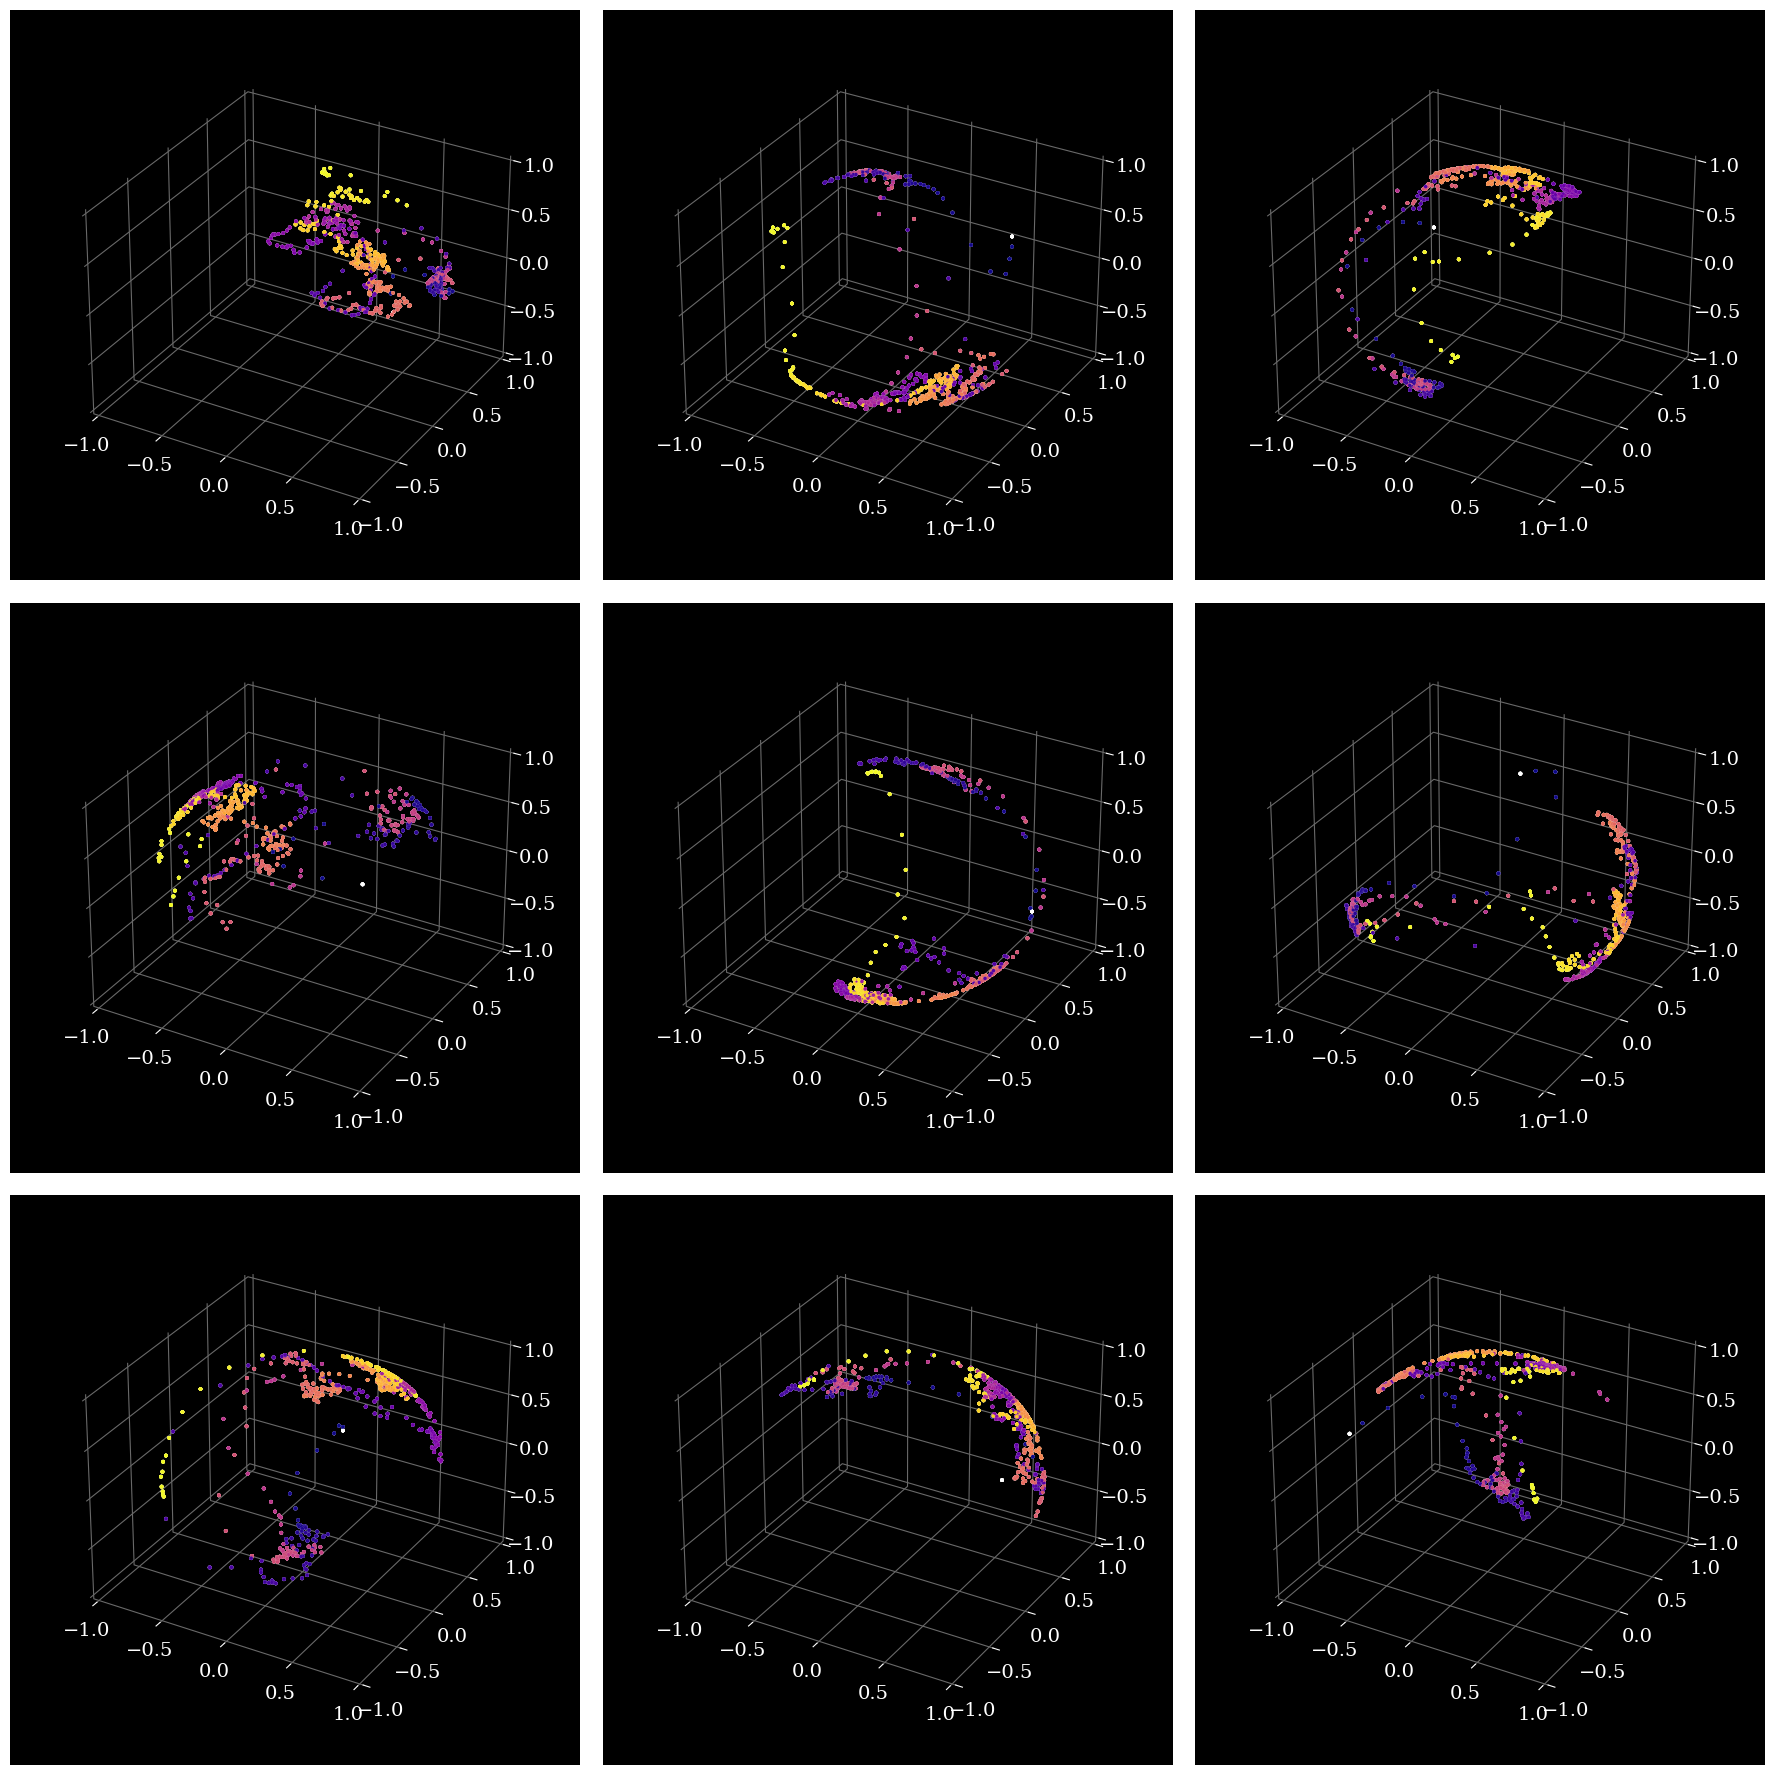

In [19]:
"""
This generates a grid of embeddings whereby the change in minumum temperature and time offsets hyperparameters can be observed for offset-36 model.

"""


import sys

sys.path.append("/home/sofia/BEng_diss")


import matplotlib.pyplot as plt
import numpy as np
import aux_functions as auxf
import matplotlib.pyplot as plt
import numpy as np
import aux_functions as auxf
import pandas as pd
from cebra import CEBRA
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator



params = {"font.family" : "serif"}
plt.rcParams.update(params)

# we are going to have a grid with time_offsets and min_temperature  -> with the 'time' colourmap -> for user 9 gesture 9

min_temp_list = [0.3, 0.5, 0.8]
time_offset_list = [15, 20, 25]

def plotGestures():

    user = 1
    # gesture = 9

    embed_directory = f'./hyperparam_plots/embedding_plots'
    auxf.ensure_directory_exists(embed_directory)



    model_ID = f"user{user}"

    emg1 = auxf.getProcessedEMG(user = user, dataset= 1, type_data = 'all')
    emg2 = auxf.getProcessedEMG(user = user, dataset= 2, type_data = 'all')

    stim1 = auxf.getProcessedData(user = user, dataset=1, mode = 'restimulus', rawBool=False)
    stim2 = auxf.getProcessedData(user = user, dataset=2, mode = 'restimulus', rawBool=False)

    glove1 = (auxf.getMappedGlove(user = user, dataset=1)).T
    glove2 = (auxf.getMappedGlove(user = user, dataset=2)).T

    # create trainval   
    emg_trainval = np.concatenate((emg1, emg2))
    glove_trainval = np.concatenate((glove1, glove2))

    emg_test = auxf.getProcessedEMG(user = user, dataset= 3, type_data = 'all')
    stim_test = auxf.getProcessedData(user = user, dataset=3, mode = 'restimulus', rawBool=False)
    glove_test = (auxf.getMappedGlove(user = user, dataset=3)).T

    fig, axes = plt.subplots(3, 3, figsize=(19, 18), subplot_kw={'projection': '3d'})  # All subplots are 3D
    axes = axes.flatten()

    gesture_list = np.arange(1, 9)

    for gesture in gesture_list:
        for i, time_offset in enumerate(time_offset_list):
            for j, min_temp in enumerate(min_temp_list):
     
                gesture = 5

                print("min_temp", min_temp)
                print("time_offset", time_offset)

                ax_index = i * len(min_temp_list) + j
                ax = axes[ax_index]

                # cebra_model = CEBRA(
                #     model_architecture = 'offset36-model',
                #     batch_size = 256,
                #     temperature_mode="auto",
                #     learning_rate = 0.0001,
                #     max_iterations = iterations,
                #     time_offsets = time_offset,
                #     output_dimension = 3,
                #     device = "cuda_if_available",
                #     verbose = True,
                #     conditional='time_delta',
                #     min_temperature=min_temp,
                # )
                
                # model = cebra_model

                # model.fit(emg_trainval, glove_trainval)

                model_path = f"./saved_models/BehContr/offset-36_timeoff{time_offset}_mintemp{min_temp}"
                # auxf.ensure_directory_exists(model_path)

                full_model_path = f"{model_path}/user{user}_regression.pt"


                model = CEBRA.load(full_model_path)
                # cebra_model.save(f"{model_path}/user{user}_mintemp{min_temp}_offset{time_offset}_model36.pt")

                start, end = auxf.cutStimulus(stimulus_data=stim_test, required_stimulus=gesture)
                print(f"on gesture {gesture} and start{start} and end{end}")


                embedding = model.transform(emg_test[start:end])


                labels = np.arange(0, len(stim_test[start: end]), 1)
                labels = labels.flatten()

                all_labels = labels

                unique_labels = np.unique(all_labels)

                # Create a new colormap from jet, but make the lowest value white
                jet = plt.cm.get_cmap('plasma', len(all_labels))
                colors = jet(np.linspace(0, 1, len(all_labels)))
                colors[0] = (1, 1, 1, 1)  # RGBA for white

                custom_cmap = LinearSegmentedColormap.from_list('custom_jet', colors, N=len(colors))

                # Create a mapping from labels to colors
                color_map = dict(zip(unique_labels, custom_cmap(np.linspace(0, 1, len(unique_labels)))))

                # Assign colors to each data point
                point_colors = [color_map[label] for label in labels]

                for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
                    axis._axinfo["grid"].update({"color": gridline_color})


                # Customizing each subplot
                ax.set_facecolor('black')
                axis_pane_color = 'black'
                ax.xaxis.set_pane_color(axis_pane_color)
                ax.yaxis.set_pane_color(axis_pane_color)
                ax.zaxis.set_pane_color(axis_pane_color)

                ax.set_box_aspect(aspect = None, zoom = 0.85)
                ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c = point_colors, s = 7, alpha = 1, edgecolors = 'white', linewidths = 0.05)
                # ax.set_title(f"{model_name}, Mintemp: {min_temp}"  , color = 'white', fontsize = miniplotsize, y = 0.97)

                ax.tick_params(axis='x', colors='white', size = 1)
                ax.xaxis.set_tick_params(labelsize=labelsize) 
                ax.tick_params(axis='y', colors='white', size = 1)
                ax.yaxis.set_tick_params(labelsize=labelsize)
                ax.tick_params(axis='z', colors='white', size = 1)
                ax.zaxis.set_tick_params(labelsize=labelsize) 

                ax.set_xlim(-1, 1)
                ax.set_ylim(-1, 1)
                ax.set_zlim(-1, 1)


                for ax in axes:
                    ax.xaxis.set_major_locator(MaxNLocator(4))
                    ax.yaxis.set_major_locator(MaxNLocator(4))
                    ax.zaxis.set_major_locator(MaxNLocator(4))

                plt.tight_layout()

        # plt.tight_layout()
        plt.grid(False)
        full_plot_path = f"{embed_directory}/BehContr/{model_ID}_offset-36_mintemp_timeoff.png"
        plt.savefig(full_plot_path)



    

# --------------------------------------# 
suptitlesize = 17
labelsize = 14
miniplotsize = 20

gridline_color = 'dimgray'
# --------------------------------------# 

iterations = 20000

user_list = [1, 2, 3, 4 ,5, 6, 7 ,9, 10]

user = 9
plotGestures()


#

In [20]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


params = {"font.family" : "serif"}
plt.rcParams.update(params)



dim_red_list = ["PCA", "UMAP", "AE", "CEBRA_BehContr", "CEBRA_hybrid", "CEBRA_SelfSup"]

regression_dir = './regression_results'

dimred__means = []

for dimred in dim_red_list:
    r2_scores = pd.read_csv(f"{regression_dir}/{dimred}/MLP/test_r2_results.csv")
    r2_scores = r2_scores.drop(['Unnamed: 0', 'user'], axis =1)

    channel_means = r2_scores.mean()
    total_mean = channel_means.mean()
    dimred__means.append(total_mean)


test_scores_r2 = pd.DataFrame(dimred__means, columns = ['Mean test $R^2$'])

dim_red_list_plot = ["PCA", "UMAP", "Autoencoder", "CEBRA-Behaviour", "CEBRA-Hybrid", "CEBRA-Time"]

test_scores_r2['Dimensionality Reduction'] = dim_red_list_plot

/tmp/ipykernel_4223/175303978.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_names)
/tmp/ipykernel_4223/175303978.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_names)


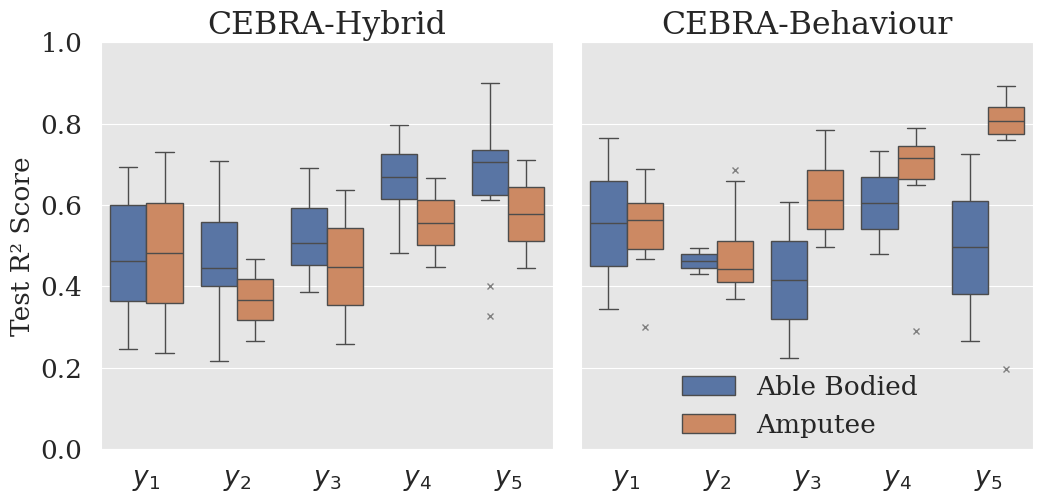

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

# Selected dimensionality reduction methods
dim_red_list_temp1 = ["CEBRA_hybrid", "CEBRA_BehContr"]

# Directory containing the results
regression_dir = './regression_results'

# Channel names to be used as x-tick labels
channel_names = ['Thumb rotation', 'Thumb flexion', 'Index flexion', 'Middle flexion', 'Ring/little flexion']
channel_names = ['$y_1$', '$y_2$', '$y_3$', '$y_4$', '$y_5$']

plot_names = ["CEBRA-Hybrid", "CEBRA-Behaviour"]


# Setup the large figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(dim_red_list_temp1), figsize=(12, 6), sharey=True)

for idx, dimred in enumerate(dim_red_list_temp1):
    # Load the R2 scores for each dimensionality reduction method
    r2_scores = pd.read_csv(f"{regression_dir}/{dimred}/MLP/test_r2_results.csv")

    # Add a group column based on user id
    r2_scores['Group'] = r2_scores['user'].apply(lambda x: 'Able Bodied' if x in range(1, 11) else 'Amputee')

    # Drop unnecessary columns
    data = r2_scores.drop(['Unnamed: 0', 'user'], axis=1)

    # Melt the data for plotting
    melted_data = data.melt(id_vars='Group', var_name='Channel', value_name='Test R² Score')


    # Create a box plot in the corresponding subplot
    ax = axes[idx]
    sns.boxplot(x='Channel', y='Test R² Score', hue='Group', data=melted_data, ax=ax, palette="deep", flierprops={'marker': 'x', 'markersize': 5, 'markeredgecolor': 'gray'})
    ax.set_title(f'{plot_names[idx]}')
    ax.set_ylabel('Test R² Score')
    ax.set_xlabel('')

    # Set the x-tick labels from the channel names list and rotate them for better visibility
    ax.set_xticklabels(channel_names)

    # Remove the y-axis label for the second plot to avoid duplication
    if idx > 0:
        ax.set_ylabel('')  

    # Remove legend from individual subplots
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()  

    ax.set_ylim(0, 1)

# Add a single legend without a title, outside the plots
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.8, 0.1), frameon=False)
fig.tight_layout(rect=[0, 0, 0.9, 0.9])  # Adjust the layout to make space for the legend
plt.savefig('./regression_results/plots/test-whiskers-umap-cebraBehContr.png', bbox_inches='tight')
plt.show()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style and dimensions
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
params = {"font.family": "serif", "font.size": 19}
plt.rcParams.update(params)

# Data and plot setup
dim_red_list_temp1 = ["CEBRA_hybrid", "CEBRA_BehContr"]
regression_dir = './regression_results'
channel_names = ['$y_1$', '$y_2$', '$y_3$', '$y_4$', '$y_5$']
plot_names = ["CEBRA-Hybrid", "CEBRA-Behaviour"]

stats_data = {}  # Dictionary to store stats data for each method

for idx, dimred in enumerate(dim_red_list_temp1):
    r2_scores = pd.read_csv(f"{regression_dir}/{dimred}/MLP/test_r2_results.csv")
    r2_scores['Group'] = r2_scores['user'].apply(lambda x: 'Able Bodied' if x in range(1, 11) else 'Amputee')
    data = r2_scores.drop(['Unnamed: 0', 'user'], axis=1)
    melted_data = data.melt(id_vars='Group', var_name='Channel', value_name='Test R² Score')

    # Compute statistics for each channel
    stats = melted_data.groupby('Channel').agg(
        Mean=('Test R² Score', 'mean'),
        Median=('Test R² Score', 'median'),
        Std=('Test R² Score', 'std'),
        Min=('Test R² Score', 'min'),
        Max=('Test R² Score', 'max')
    )

    # Store stats in dictionary with the method name as the key
    stats_data[plot_names[idx]] = stats

    # Plotting code continues as before...
    # ...

# Access the statistics DataFrames for each method
df_cebra_hybrid = stats_data["CEBRA-Hybrid"]
df_cebra_behaviour = stats_data["CEBRA-Behaviour"]

df_cebra_behaviour

,Mean,Median,Std,Min,Max
Channel,,,,,
test_r2_ch0,0.548457,0.564378,0.135763,0.299532,0.764437
test_r2_ch1,0.479517,0.443665,0.100424,0.369588,0.687024
test_r2_ch2,0.583898,0.604547,0.142217,0.225206,0.784721
test_r2_ch3,0.663140,0.716220,0.141998,0.291405,0.789394
test_r2_ch4,0.711432,0.797037,0.228851,0.197579,0.893738


In [43]:
df_cebra_hybrid

,Mean,Median,Std,Min,Max
Channel,,,,,
test_r2_ch0,0.480042,0.462054,0.171781,0.235955,0.729364
test_r2_ch1,0.444268,0.440416,0.141939,0.216894,0.707309
test_r2_ch2,0.509003,0.506047,0.128552,0.258395,0.689986
test_r2_ch3,0.641816,0.668446,0.115776,0.446895,0.795860
test_r2_ch4,0.647001,0.697109,0.171947,0.327985,0.899655


In [27]:
test = pd.read_csv("regression_results/CEBRA_BehContr/MLP/bestmodel_results.csv")

dimred_cv_means = []

for dimred in dim_red_list:
    test = pd.read_csv(f"{regression_dir}/{dimred}/MLP/bestmodel_results.csv")
    test = test.drop(['Unnamed: 0', 'user', 'best_params'], axis =1)
    cv_mean = test['best_score_r2'].mean()
    dimred_cv_means.append(cv_mean)


cv_scores_r2 = pd.DataFrame(dimred_cv_means, columns = ['Mean $R^2$'])

cv_scores_r2['Dimensionality Reduction'] = dim_red_list_plot
print(dim_red_list_plot)

cv_scores_r2['test_type'] = 'CV'
test_scores_r2['test_type'] = 'Test'

test_scores_r2__ = test_scores_r2.rename(columns = {'Mean test $R^2$':'Mean $R^2$'})

cv_and_test_scores = pd.concat((cv_scores_r2, test_scores_r2__), axis = 0)

['PCA', 'UMAP', 'Autoencoder', 'CEBRA-Behaviour', 'CEBRA-Hybrid', 'CEBRA-Time']


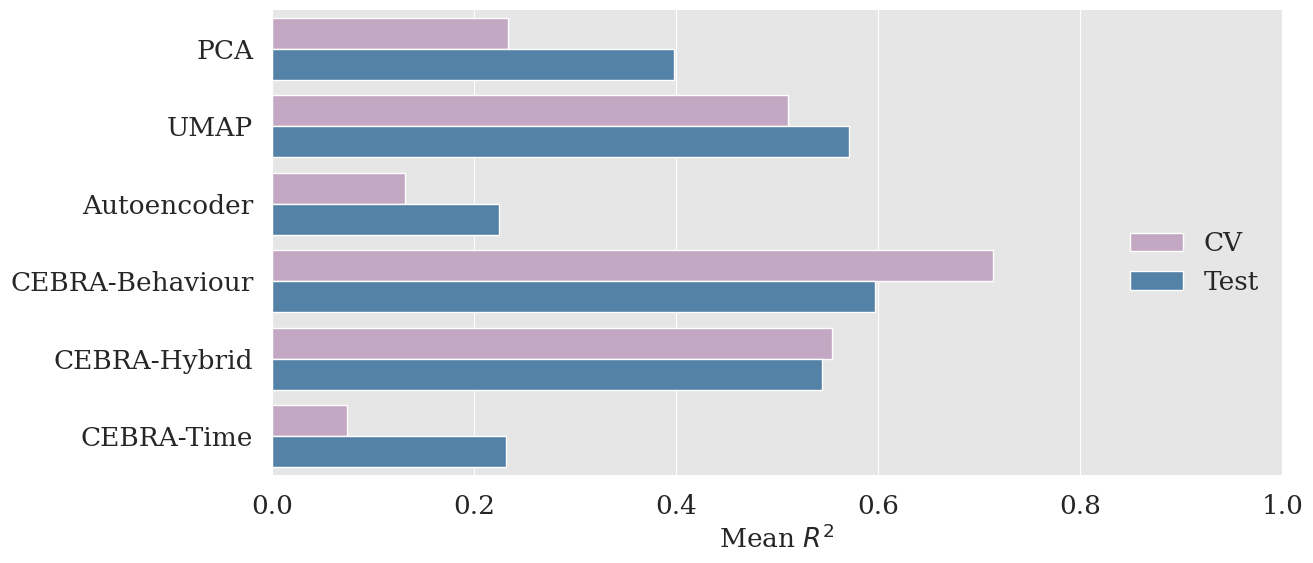

In [28]:
df_long_cv_test = cv_and_test_scores.melt(id_vars=["Dimensionality Reduction", "test_type"], value_vars=["Mean $R^2$"], 
                  var_name="Metric", value_name="Value")


params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)



custom_colors = ["#C8A2C8", "#4682B4"]  # Orange and Purple in hex


# Create the catplot
catplot = sns.catplot(y="Dimensionality Reduction", x="Value", hue="test_type", data=df_long_cv_test, kind="bar", height=6, aspect=2, orient = 'h', palette=custom_colors)

# Improve layout for readability
plt.xticks()
plt.ylabel("")
plt.xlabel("Mean $R^2$")
plt.title("")
# plt.tight_layout()
catplot.set(xlim=(-0.5, 1))  # Adjust limits as needed
catplot._legend.set_title(None)
catplot._legend.set_bbox_to_anchor((0.95, 0.5)) # Adjust these values as needed
catplot.set(xlim=(0, 1))

plt.tight_layout()
plt.savefig(f"{regression_dir}/plots/dimred_comparison_cv_test_r2.png")

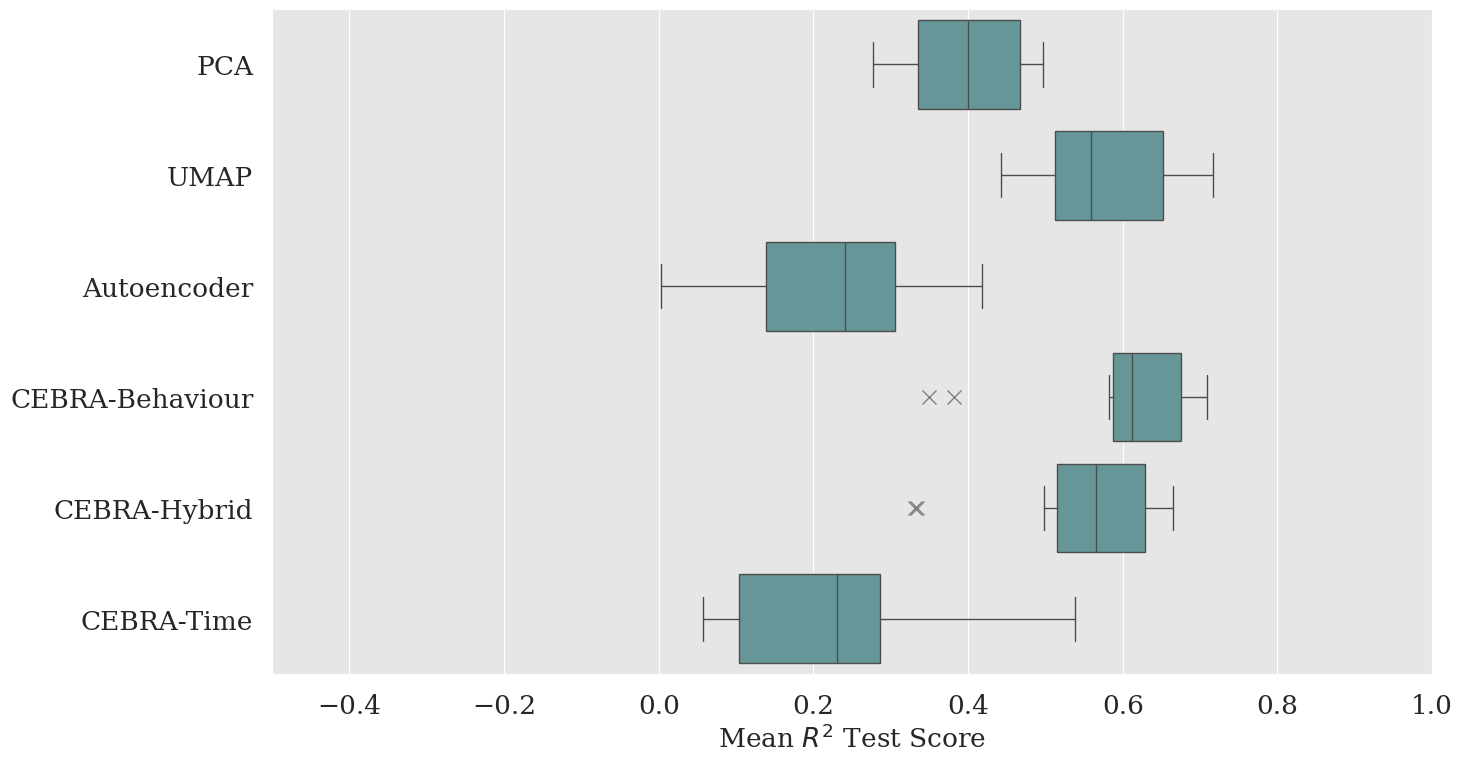

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)


# Initialize variables
dim_red_list = ["PCA", "UMAP", "AE", "CEBRA_BehContr", "CEBRA_hybrid", "CEBRA_SelfSup"]
regression_dir = './regression_results'

# Prepare an empty DataFrame for aggregating mean scores
all_means = pd.DataFrame()

# Iterate over each dimensionality reduction tool and calculate the mean R² score across all channels
for i, dimred in enumerate(dim_red_list):
    filepath = f"{regression_dir}/{dimred}/MLP/test_r2_results.csv"
    df = pd.read_csv(filepath)
    # Drop unwanted columns and calculate mean across the R² score channels
    df = df.drop(['Unnamed: 0', 'user'], axis=1)
    df['Mean R² Score'] = df.mean(axis=1)
    df['Dimensionality Reduction'] = dim_red_list_plot[i]  # Add a column to label the data
    # Append only the means and labels to the all_means DataFrame
    all_means = pd.concat([all_means, df[['Mean R² Score', 'Dimensionality Reduction']]], ignore_index=True)



# Plotting
plt.figure(figsize=(15, 8))
ax = sns.boxplot(y='Dimensionality Reduction', x='Mean R² Score', data=all_means, orient='h', 
                 flierprops={'marker': 'x', 'markersize': 10, 'markeredgecolor': 'gray'}, color='cadetblue')


plt.ylabel("")
plt.xlabel("Mean $R^2$ Test Score")
ax.set_xlim((-0.5, 1))
plt.tight_layout()
plt.savefig(f"{regression_dir}/plots/dimred_whiskerplot.png")

plt.show()




In [44]:
stats = all_means.groupby('Dimensionality Reduction')['Mean R² Score'].describe()
stats['IQR'] = stats['75%'] - stats['25%']
stats['Median'] = stats['50%']
stats = stats[['mean', 'min', '25%', 'Median', '75%', 'max', 'IQR']]


,Mean R² Score,Dimensionality Reduction
0,0.459420,PCA
1,0.348352,PCA
2,0.276905,PCA
3,0.490404,PCA
4,0.333192,PCA
...,...,...
67,0.057463,CEBRA-Time
68,0.108547,CEBRA-Time
69,0.538064,CEBRA-Time
70,0.485236,CEBRA-Time


In [64]:
import pandas as pd
import numpy as np

# Initialize variables
dim_red_list = ["PCA", "UMAP", "AE", "CEBRA_BehContr", "CEBRA_hybrid", "CEBRA_SelfSup"]
regression_dir = './regression_results'

# Prepare lists to store data for each user category
all_users_stats = []
ab_users_stats = []
amp_users_stats = []

# Iterate over each dimensionality reduction method
for dimred in dim_red_list:
    filepath = f"{regression_dir}/{dimred}/MLP/test_r2_results.csv"
    df = pd.read_csv(filepath)
    df = df.drop(['Unnamed: 0'], axis=1)


    # Calculate means and other statistics for all users
    user_means = df.drop('user', axis=1).mean(axis=1)
    all_users_stats.append([
        user_means.mean(),  # Mean
        user_means.min(),   # Min
        user_means.max(),   # Max
        np.percentile(user_means, 75) - np.percentile(user_means, 25)  # IQR
    ])

    # Separate data for able-bodied users
    AB_df = df[df['user'].isin(range(1, 11))]
    AB_user_means = AB_df.drop('user', axis=1).mean(axis=1)
    ab_users_stats.append([
        AB_user_means.mean(),
        AB_user_means.min(),
        AB_user_means.max(),
        np.percentile(AB_user_means, 75) - np.percentile(AB_user_means, 25)
    ])

    # Separate data for amputee users
    Amp_df = df[df['user'].isin([11, 12])]
    Amp_user_means = Amp_df.drop('user', axis=1).mean(axis=1)
    amp_users_stats.append([
        Amp_user_means.mean(),
        Amp_user_means.min(),
        Amp_user_means.max(),
        np.percentile(Amp_user_means, 75) - np.percentile(Amp_user_means, 25)
    ])

# Convert lists to DataFrames
all_users_df = pd.DataFrame(all_users_stats, columns=['Mean', 'Min', 'Max', 'IQR'], index=dim_red_list)
ab_users_df = pd.DataFrame(ab_users_stats, columns=['Mean', 'Min', 'Max', 'IQR'], index=dim_red_list)
amp_users_df = pd.DataFrame(amp_users_stats, columns=['Mean', 'Min', 'Max', 'IQR'], index=dim_red_list)

# Print or return the DataFrames as needed
print("All Users Data:")
print(all_users_df)
print("\nAble-Bodied Users Data:")
print(ab_users_df)
print("\nAmputee Users Data:")
print(amp_users_df)



All Users Data:
                    Mean       Min       Max       IQR
PCA             0.397505  0.276905  0.497155  0.131052
UMAP            0.571089  0.442491  0.716778  0.138775
AE              0.224958  0.002784  0.418354  0.166680
CEBRA_BehContr  0.597289  0.348941  0.709314  0.087672
CEBRA_hybrid    0.544426  0.330733  0.664774  0.113357
CEBRA_SelfSup   0.231929  0.057463  0.538064  0.182893

Able-Bodied Users Data:
                    Mean       Min       Max       IQR
PCA             0.401801  0.276905  0.497155  0.144327
UMAP            0.587624  0.450986  0.716778  0.131072
AE              0.245204  0.049470  0.418354  0.175384
CEBRA_BehContr  0.615346  0.382292  0.709314  0.104750
CEBRA_hybrid    0.555943  0.333892  0.664774  0.095633
CEBRA_SelfSup   0.220893  0.057463  0.538064  0.164310

Amputee Users Data:
                    Mean       Min       Max       IQR
PCA             0.376025  0.336488  0.415562  0.039537
UMAP            0.488416  0.442491  0.534341  0.045925
AE 

In [33]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


params = {"font.family" : "serif"}
plt.rcParams.update(params)

from sklearn.metrics import explained_variance_score



list_users = np.arange(1, 13)



for dimred in dim_red_list:

    estimates_path = f"{regression_dir}/{dimred}/MLP/estimates"
    EV_scores = []

    for user in list_users:

        user_EV_scores = []

        emg1 = auxf.getProcessedEMG(user = user, dataset= 1, type_data = 'all')
        emg2 = auxf.getProcessedEMG(user = user, dataset= 2, type_data = 'all')
        emg3 = auxf.getProcessedEMG(user = user, dataset= 3, type_data = 'all')


        stim1 = auxf.getProcessedData(user = user, dataset=1, mode = 'restimulus', rawBool=False)
        stim2 = auxf.getProcessedData(user = user, dataset=2, mode = 'restimulus', rawBool=False)
        stim3 = auxf.getProcessedData(user = user, dataset=3, mode = 'restimulus', rawBool=False)

        glove1 = (auxf.getMappedGlove(user = user, dataset=1)).T
        glove2 = (auxf.getMappedGlove(user = user, dataset=2)).T
        glove3 = (auxf.getMappedGlove(user = user, dataset=3)).T


        estimates = pd.read_csv(f"{estimates_path}/test_user{user}.csv")
        estimates = np.array(estimates)


        DoA_list = [0, 1, 2, 3, 4]

        user_EV_scores = [user]

        for DoA in DoA_list: 
            EV_score = explained_variance_score(glove3[:, DoA], estimates[: , DoA])

            user_EV_scores.append(EV_score)

        EV_scores.append(user_EV_scores)

        reg_results_df = pd.DataFrame(EV_scores, columns = ['user', 'test_ev_ch0', 'test_ev_ch1', 'test_ev_ch2', 'test_ev_ch3', 'test_ev_ch4'])

        reg_results_path = f'./regression_results/{dimred}/MLP'

        reg_results_df.to_csv(f"{reg_results_path}/test_EV_results.csv")



dim_red_list = ["PCA", "UMAP", "AE" ,"CEBRA_BehContr", "CEBRA_hybrid", "CEBRA_SelfSup"]

regression_dir = './regression_results'

dimred__means_ev = []

for dimred in dim_red_list:
    ev_scores = pd.read_csv(f"{regression_dir}/{dimred}/MLP/test_EV_results.csv")
    ev_scores = ev_scores.drop(['Unnamed: 0', 'user'], axis =1)

    channel_means_ev = ev_scores.mean()
    total_mean_ev = channel_means_ev.mean()
    dimred__means_ev.append(total_mean_ev)


test_scores_ev = pd.DataFrame(dimred__means_ev, columns = ['Mean test explained var'])
dim_red_list_plot = ["PCA", "UMAP", "Autoencoder", "CEBRA BehContr", "CEBRA Hybrid", "CEBRA SelfSup"]


test_scores_ev['Dimensionality Reduction'] = dim_red_list_plot

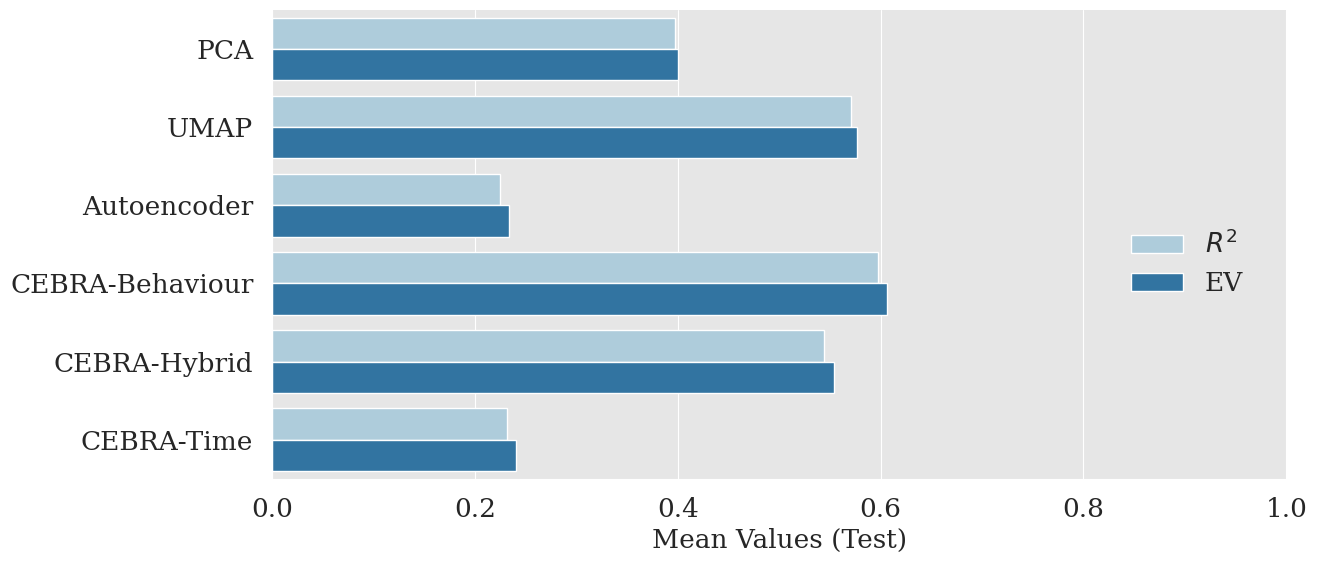

In [34]:
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

test_scores_total = test_scores_r2

test_scores_total['EV'] = test_scores_ev["Mean test explained var"]
test_scores_total = test_scores_total.rename(columns={"Mean test $R^2$":"$R^2$"})

test_scores_total

df_long = test_scores_total.melt(id_vars=["Dimensionality Reduction"], value_vars=["$R^2$", "EV"], 
                  var_name="Metric", value_name="Value")


# Create the catplot
catplot = sns.catplot(y="Dimensionality Reduction", x="Value", hue="Metric", data=df_long, kind="bar", height=6, aspect=2, orient = 'h', palette='Paired')

# Improve layout for readability
plt.xticks()
plt.ylabel("")
plt.xlabel("Mean Values (Test)")
plt.title("")
plt.tight_layout()
catplot.set(xlim=(-0.5, 1))  # Adjust limits as needed
catplot._legend.set_title(None)
catplot._legend.set_bbox_to_anchor((0.95, 0.5)) # Adjust these values as needed
catplot.set(xlim=(0, 1))

plt.savefig(f'{regression_dir}/plots/rsq_EV_comp.png')


# Show the plot
plt.show()


In [77]:
"""

Calculate stats for classification

"""

classif_df = pd.read_csv("./classification/results_gridsearch_final/classif_results.csv")


classif_df = classif_df[['user', 'best_score_cebra', 'best_score, lda']]


AB_df = classif_df[classif_df['user'].isin(range(1, 11))]
Amp_df = classif_df[classif_df['user'].isin([11, 12])]




In [82]:
import pandas as pd
import numpy as np

# Load the classification results
classif_df = pd.read_csv("./classification/results_gridsearch_final/classif_results.csv")

# Filter for relevant columns
classif_df = classif_df[['user', 'CEBRA_acc', 'LDA_acc']]  # Note: fixed typo in column name

# Separate data for able-bodied and amputee users
AB_df = classif_df[classif_df['user'].isin(range(1, 11))]
Amp_df = classif_df[classif_df['user'].isin([11, 12])]

# Function to calculate statistics
def calculate_stats(df):
    stats = df.describe().loc[['mean']]  # Get mean, min, max directly from describe()
    # Calculate IQR: Q3 (75%) - Q1 (25%)
    return stats

# Calculate statistics for AB and Amp users
AB_stats = calculate_stats(AB_df[['CEBRA_acc', 'LDA_acc']])
Amp_stats = calculate_stats(Amp_df[['CEBRA_acc', 'LDA_acc']])

# Display the results
print("Able-Bodied Users Statistics:")
print(AB_stats)
print("\nAmputee Users Statistics:")
print(Amp_stats)


Able-Bodied Users Statistics:
      best_score_cebra  best_score, lda
mean          0.708754         0.682165

Amputee Users Statistics:
      best_score_cebra  best_score, lda
mean          0.823931         0.767847


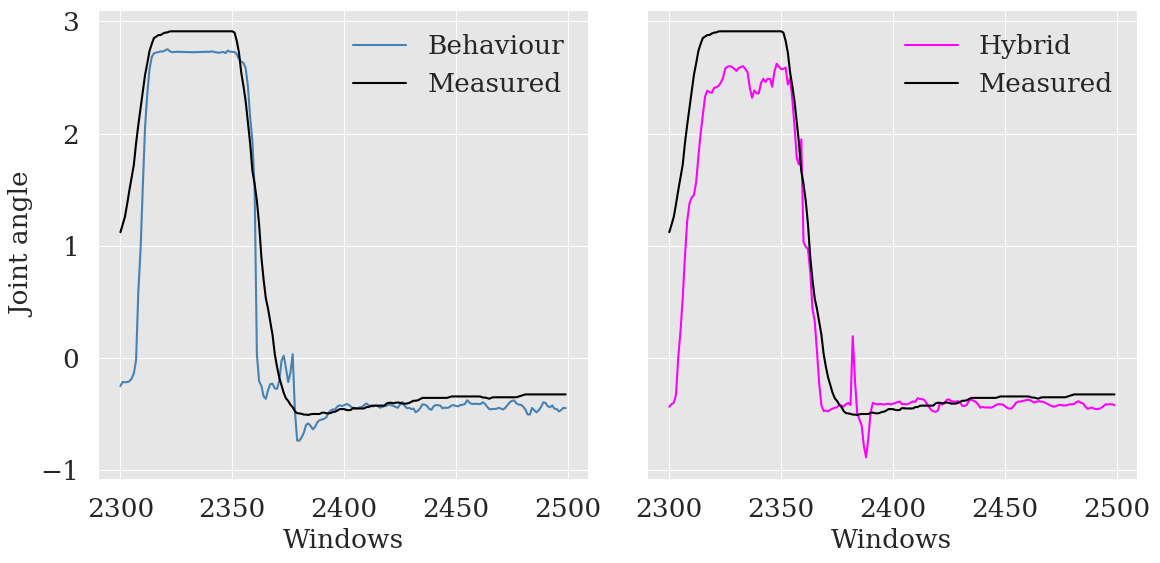

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aux_functions as auxf
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
params = {"font.family": "serif", "font.size": 19}  # Added font.size as an example
plt.rcParams.update(params)

def load_data(user, joint, path):
    df = pd.read_csv(path)
    return df[str(joint)]

def plot_joint_angle(ax, x_range, y_data, label, color, ylabel=None):
    ax.plot(x_range, y_data, label=label, color=color)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.set_xlabel("Windows")
    ax.legend(frameon = False)

user = 8
joint = 4
cut_start = 2300
cut_end = 2500

testID = f'user{user}_ch{joint}_start{cut_start}_end{cut_end}'

# Load data
behc = load_data(user, joint, f'./regression/results_analysis/regression_results/CEBRA_BehContr/MLP/estimates/test_user{user}.csv')
selfs = load_data(user, joint, f'./regression/results_analysis/regression_results/CEBRA_SelfSup/MLP/estimates/test_user{user}.csv')
hybr = load_data(user, joint, f'./regression/results_analysis/regression_results/CEBRA_hybrid/MLP/estimates/test_user{user}.csv')

# Replace `auxf.getMappedGlove` with the correct function to get glove data, assuming `auxf.getMappedGlove` is defined.
glove = auxf.getMappedGlove(user=user, dataset=3)[joint]
x_dummy = np.arange(cut_start, cut_end)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize = (12, 6), sharey = True)

# First plot
plot_joint_angle(axs[0], x_dummy, behc[cut_start:cut_end], 'Behaviour', 'steelblue', ylabel='Joint angle')
plot_joint_angle(axs[0], x_dummy, glove[cut_start:cut_end], 'Measured', 'black')


plot_joint_angle(axs[1], x_dummy, hybr[cut_start:cut_end], 'Hybrid', 'magenta')
plot_joint_angle(axs[1], x_dummy, glove[cut_start:cut_end], 'Measured', 'black')

# # Second plot
# plot_joint_angle(axs[1, 0], x_dummy, selfs[cut_start:cut_end], 'Time', 'red', ylabel  = 'Joint angle')
# plot_joint_angle(axs[1, 0], x_dummy, glove[cut_start:cut_end], 'Measured', 'black')
# # Third plot

# # Fourth plot
# plot_joint_angle(axs[1, 1], x_dummy, glove[cut_start:cut_end], 'Measured', 'black')

plt.tight_layout()
plt.show()
